# Grouping and Summarising Dataframes

Grouping and aggregation are some of the most frequently used operations in data analysis, especially while doing exploratory data analysis (EDA), where comparing summary statistics across groups of data is common.

For e.g., in the retail sales data we are working with, you may want to compare the average sales of various regions, or compare the total profit of two customer segments. 

Grouping analysis can be thought of as having three parts:
1. **Splitting** the data into groups (e.g. groups of customer segments, product categories, etc.)
2. **Applying** a function to each group (e.g. mean or total sales of each customer segment)
3. **Combining** the results into a data structure showing the summary statistics

Let's work through some examples.

In [1]:
# Loading libraries and files
import numpy as np
import pandas as pd

market_df = pd.read_csv("./global_sales_data/market_fact.csv")
customer_df = pd.read_csv("./global_sales_data/cust_dimen.csv")
product_df = pd.read_csv("./global_sales_data/prod_dimen.csv")
shipping_df = pd.read_csv("./global_sales_data/shipping_dimen.csv")
orders_df = pd.read_csv("./global_sales_data/orders_dimen.csv")

Say you want to understand how well or poorly the business is doing in various customer segments, regions, product categories etc. Specifically, you want to identify areas of business where you are incurrring heavy losses, and want to take action accordingly.

To do that, we will answer questions such as:
* Which customer segments are the least profitable?
* Which product categories and sub-categories are the least profitable?
* Customers in which geographic region cause the most losses?
* Etc.

First, we will merge all the dataframes, so we have all the data in one ```master_df```.

In [2]:
# Merging the dataframes one by one
df_1 = pd.merge(market_df, customer_df, how='inner', on='Cust_id')
df_2 = pd.merge(df_1, product_df, how='inner', on='Prod_id')
df_3 = pd.merge(df_2, shipping_df, how='inner', on='Ship_id')
master_df = pd.merge(df_3, orders_df, how='inner', on='Ord_id')

master_df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,...,Region,Customer_Segment,Product_Category,Product_Sub_Category,Order_ID_x,Ship_Mode,Ship_Date,Order_ID_y,Order_Date,Order_Priority
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,...,WEST,CORPORATE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",36262,REGULAR AIR,28-07-2010,36262,27-07-2010,NOT SPECIFIED
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,...,WEST,CORPORATE,TECHNOLOGY,TELEPHONES AND COMMUNICATION,36262,EXPRESS AIR,27-07-2010,36262,27-07-2010,NOT SPECIFIED
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,...,WEST,CORPORATE,OFFICE SUPPLIES,PAPER,36262,EXPRESS AIR,28-07-2010,36262,27-07-2010,NOT SPECIFIED
3,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,...,ONTARIO,HOME OFFICE,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",37863,REGULAR AIR,26-02-2011,37863,24-02-2011,HIGH
4,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,...,WEST,CONSUMER,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",53026,REGULAR AIR,03-03-2012,53026,26-02-2012,LOW


#### Step 1. Grouping using ```df.groupby()```

Typically, you group the data using a categorical variable, such as customer segments, product categories, etc. This creates as many subsets of the data as there are levels in the categorical variable. 

For example, in this case, we will group the data along ```Customer_Segment```.

In [3]:
# Which customer segments are the least profitable? 

# Step 1. Grouping: First, we will group the dataframe by customer segments
# we dont do master_df.groupby('Customer_Segment').groups because after doing this rest of the functions would not work.
df_by_segment = master_df.groupby('Customer_Segment')
df_by_segment

Note that ```df.groupby``` returns a DataFrameGroupBy object.

#### Step 2. Applying a Function

After grouping, you apply a function to a **numeric variable**, such as ```mean(Sales)```, ```sum(Profit)```, etc. 

In [4]:
# Step 2. Applying a function
# We can choose aggregate functions such as sum, mean, median, etc.
df_by_segment['Profit'].sum()

Customer_Segment
CONSUMER          287959.94
CORPORATE         599746.00
HOME OFFICE       318354.03
SMALL BUSINESS    315708.01
Name: Profit, dtype: float64

Notice that we have indexed the ```Profit``` column in the DataFrameGroupBy object exactly as we index a normal column in a dataframe. Alternatively, you could also use ```df_by_segment.Profit```. 

In [5]:
# Alternatively
df_by_segment.Profit.sum()

Customer_Segment
CONSUMER          287959.94
CORPORATE         599746.00
HOME OFFICE       318354.03
SMALL BUSINESS    315708.01
Name: Profit, dtype: float64

So this tells us that profits are the least in the CONSUMER segment, and highest in the CORPORATE segment.

In [6]:
# For better readability, you may want to sort the summarised series:
df_by_segment.Profit.sum().sort_values(ascending = False)

Customer_Segment
CORPORATE         599746.00
HOME OFFICE       318354.03
SMALL BUSINESS    315708.01
CONSUMER          287959.94
Name: Profit, dtype: float64

#### Step 3. Combining the results into a Data Structure

You can optionally show the results as a dataframe.

In [7]:
# Converting to a df
pd.DataFrame(df_by_segment['Profit'].sum())

,Profit
Customer_Segment,
CONSUMER,287959.94
CORPORATE,599746.00
HOME OFFICE,318354.03
SMALL BUSINESS,315708.01


In [8]:
# Let's go through some more examples
# E.g.: Which product categories are the least profitable?

# 1. Group by product category
by_product_cat = master_df.groupby('Product_Category')

In [9]:
# 2. This time, let's compare average profits
# Apply mean() on Profit
by_product_cat['Profit'].mean()

Product_Category
FURNITURE           68.116607
OFFICE SUPPLIES    112.369074
TECHNOLOGY         429.207516
Name: Profit, dtype: float64

FURNITURE is the least profitable, TECHNOLOGY the most. Let's see which product sub-cetgories within FURNITURE are less profitable.

In [10]:
# E.g.: Which product categories and sub-categories are the least profitable?
# 1. Group by category and sub-category
by_product_cat_subcat = master_df.groupby(['Product_Category', 'Product_Sub_Category'])
by_product_cat_subcat['Profit'].mean()

Product_Category  Product_Sub_Category          
FURNITURE         BOOKCASES                         -177.683228
                  CHAIRS & CHAIRMATS                 387.693601
                  OFFICE FURNISHINGS                 127.446612
                  TABLES                            -274.411357
OFFICE SUPPLIES   APPLIANCES                         223.866498
                  BINDERS AND BINDER ACCESSORIES     335.970918
                  ENVELOPES                          195.864228
                  LABELS                              47.490174
                  PAPER                               36.949551
                  PENS & ART SUPPLIES                 11.950679
                  RUBBER BANDS                        -0.573575
                  SCISSORS, RULERS AND TRIMMERS      -54.161458
                  STORAGE & ORGANIZATION              12.205403
TECHNOLOGY        COMPUTER PERIPHERALS               124.389815
                  COPIERS AND FAX                   192

Thus, within FURNITURE, TABLES are the least profitable, followed by BOOKCASES.

In [11]:
# Recall the df.describe() method?
# To apply multiple functions simultaneously, you can use the describe() function on the grouped df object
by_product_cat['Profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
FURNITURE,1724.0,68.116607,1112.923257,-11053.60,-281.3550,-14.250,187.1600,8614.79
OFFICE SUPPLIES,4610.0,112.369074,744.617939,-2175.09,-57.0225,-3.845,56.9475,11535.28
TECHNOLOGY,2065.0,429.207516,1863.208375,-14140.70,-88.9400,66.220,561.1300,27220.69


In [12]:
# Some other summary functions to apply on groups
by_product_cat['Profit'].count()

Product_Category
FURNITURE          1724
OFFICE SUPPLIES    4610
TECHNOLOGY         2065
Name: Profit, dtype: int64

In [13]:
by_product_cat['Profit'].min()

Product_Category
FURNITURE         -11053.60
OFFICE SUPPLIES    -2175.09
TECHNOLOGY        -14140.70
Name: Profit, dtype: float64

In [14]:
# E.g. Customers in which geographic region are the least profitable?
master_df.groupby('Region').Profit.mean()

Region
ATLANTIC                 221.259870
NORTHWEST TERRITORIES    255.464670
NUNAVUT                   35.963418
ONTARIO                  189.960865
PRARIE                   188.253294
QUEBEC                   179.803649
WEST                     149.175595
YUKON                    136.253155
Name: Profit, dtype: float64

In [15]:
# Note that the resulting object is a Series, thus you can perform vectorised computations on them

# E.g. Calculate the Sales across each region as a percentage of total Sales
# You can divide the entire series by a number (total sales) easily 
(master_df.groupby('Region').Sales.sum() / sum(master_df['Sales']))*100

Region
ATLANTIC                 13.504305
NORTHWEST TERRITORIES     5.369193
NUNAVUT                   0.780233
ONTARIO                  20.536970
PRARIE                   19.022396
QUEBEC                   10.124936
WEST                     24.119372
YUKON                     6.542595
Name: Sales, dtype: float64

The regions ONTARIO, WEST and PRARIE comprise of about 64% of the sales.

Until now, we've been working with the data without making changes or additions to it. In the next section, we will create new columns, alter existing columns and apply some more grouping and summarising.



<BarContainer object of 8399 artists>

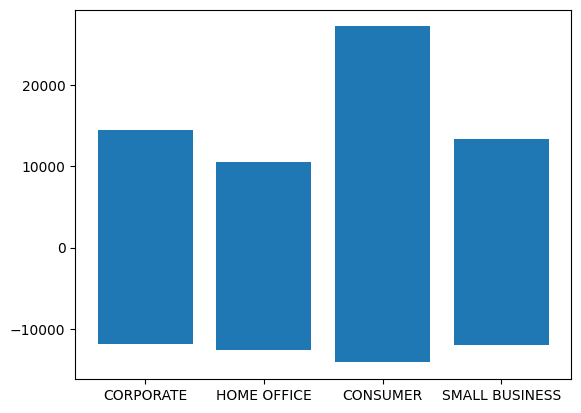

In [26]:
import matplotlib.pyplot as plt
plt.bar(master_df['Customer_Segment'],master_df['Profit'])

(array([7.000e+00, 9.000e+00, 7.300e+01, 8.066e+03, 1.880e+02, 4.600e+01,
        9.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-14140.7  , -10004.561,  -5868.422,  -1732.283,   2403.856,
          6539.995,  10676.134,  14812.273,  18948.412,  23084.551,
         27220.69 ]),
 <BarContainer object of 10 artists>)

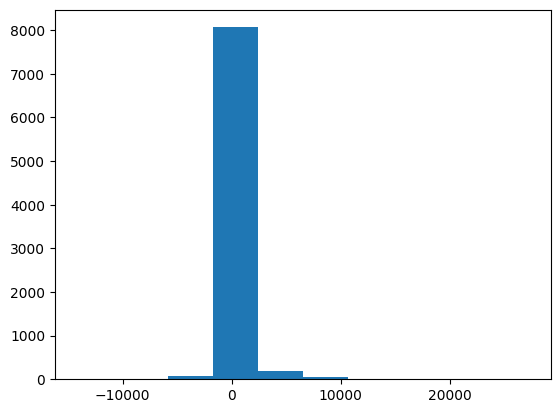

In [20]:
plt.hist(master_df['Profit'])

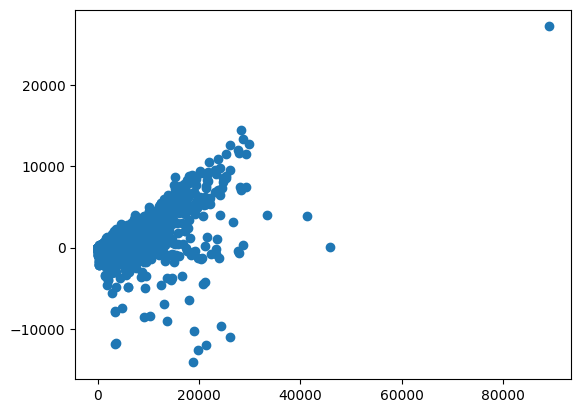

In [25]:
plt.scatter(x=master_df['Sales'],y=master_df['Profit'])

<Axes: xlabel='Customer_Segment', ylabel='Profit'>

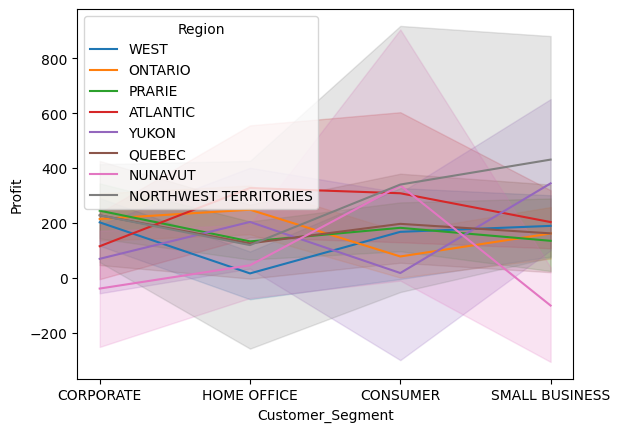

In [30]:
import seaborn as sns
sns.lineplot(x='Customer_Segment',y='Profit',hue='Region',data=master_df)